In [4]:
import pandas as pd
import numpy as np
import pickle
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,632 (18.10 KB)

 Trainable params: 4,502 (17.59 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 2 (12.00 B)

 39/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

c:\Program Files\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


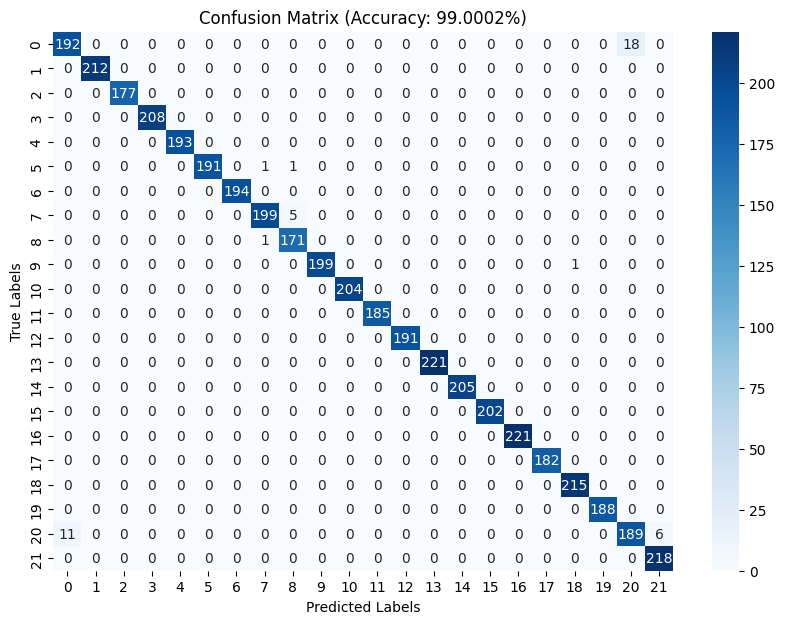

In [13]:

# File paths
model_path = r"Trained_models\my_model.h5"
scaler_path = r"Trained_models\scaler.pkl"
data_path = r"Datasets\testing_data.csv"
decode_path = r"Datasets\encoding.csv"

# Load the saved model
model = load_model(model_path)
model.summary()

# Load the saved scaler
with open(scaler_path, "rb") as f:
    scaler = pickle.load(f)

# Load the dataset for prediction
df = pd.read_csv(data_path)

# Extract features and true labels
X_test = df.iloc[:, :7].values  # Adjust if needed
y_true = df.iloc[:, 7].values   # Assuming the label column is at index 7

# Scale the features
X_test_scaled = scaler.transform(X_test)

# Predict
predictions = model.predict(X_test_scaled)
y_pred = np.argmax(predictions, axis=1)

# Compute confusion matrix and accuracy
conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = (accuracy_score(y_true, y_pred))*100.00


# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.4f}%)')
plt.show()